# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
calls = pd.read_csv('911.csv')
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# investigate the desc column to see what it contains exactly
# seems to have address, city, station #, date, time
calls.loc[10:30,'desc']

10    RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...
11    BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...
12    BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...
13    OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...
14    SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...
15    STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...
16    SUSQUEHANNA AVE & W MAIN ST;  LANSDALE; Statio...
17    CHARLOTTE ST & MILES RD;  NEW HANOVER; Station...
18    PENN ST & ARCH ST;  NORRISTOWN; Station 308A; ...
19    COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...
20    PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...
21    CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...
22    LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...
23    RT422  & PAWLINGS RD OVERPASS; LOWER PROVIDENC...
24    SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...
25    SHANNONDELL DR & SHANNONDELL BLVD;  LOWER PROV...
26    PENLLYN BLUE BELL PIKE & VILLAGE CIR;  WHITPAI...
27    EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2

In [5]:
import re
calls['station'] = calls['desc'].apply(lambda x: re.search("Station \d+", x).group() if re.search("Station \d+", x) else np.nan)
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'], yearfirst=True, format='%Y/%m/%d')

In [6]:
calls[['title','twp','addr']] = calls[['title','twp','addr']].apply(lambda x: x.str.lower())
calls[['category', 'issue']] = calls['title'].str.split(':', expand = True)

In [7]:
drop_cols = ['desc', 'title', 'e', 'issue']
calls = calls.drop(drop_cols, axis=1)
calls = calls[['lat', 'lng', 'zip', 'category', 'twp', 'addr', 'timeStamp']]
calls.rename(columns={'twp':'town',
                      'timeStamp': 'datetime',
                     }, inplace=True)

** What are the top 5 zipcodes for 911 calls? **

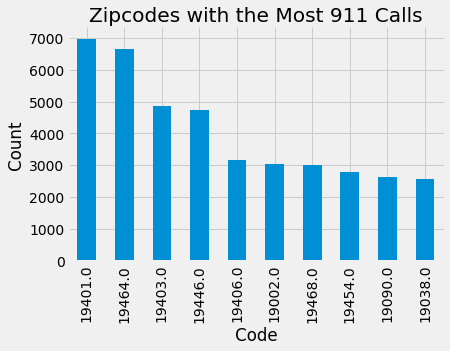

In [8]:
by_zip = calls.groupby('zip').agg('count').loc[:,'lat'].rename(columns={'lat':'count'})

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
by_zip.sort_values(ascending=False).head(10).plot.bar(ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title = 'Zipcodes with the Most 911 Calls',
       xlabel = 'Code',
       ylabel = 'Count');

In [9]:
top10 = pd.DataFrame(by_zip.sort_values(ascending=False).head(10))
top10 = top10.reset_index().rename(columns={0:'count'})
calls.loc[calls['zip'].isin(top10['zip']), 'town'].unique()

array(['hatfield township', 'norristown', 'lansdale', 'upper gwynedd',
       'lower providence', 'cheltenham', 'upper merion', 'limerick',
       'pottstown', 'ambler', 'montgomery', 'lower pottsgrove', 'horsham',
       'springfield', 'west norriton', 'upper moreland', 'royersford',
       'abington', 'upper dublin', 'towamencin', 'whitemarsh',
       'east norriton', 'lower gwynedd', 'worcester', 'upper providence',
       'plymouth', 'west pottsgrove', 'upper pottsgrove', 'bridgeport',
       'north wales', 'whitpain', 'douglass', 'new hanover', nan,
       'lower frederick', 'berks county', 'trappe', 'perkiomen',
       'phila county', 'bucks county', 'upper hanover', 'chester county'],
      dtype=object)

** What are the top 5 townships (twp) for 911 calls? **

In [10]:
by_town = calls.groupby('town').count().loc[:,'lat'].sort_values(ascending=False).head(10)
by_town

town
lower merion        8443
abington            5977
norristown          5890
upper merion        5227
cheltenham          4575
pottstown           4146
upper moreland      3434
lower providence    3225
plymouth            3158
horsham             3003
Name: lat, dtype: int64

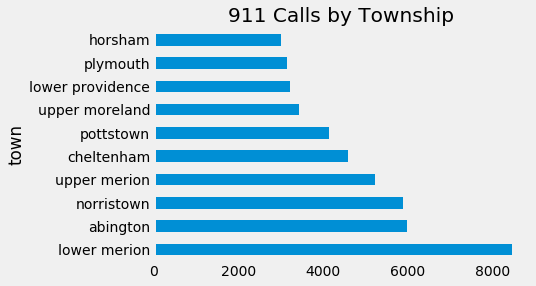

In [11]:
fig, ax = plt.subplots(1,1)
by_town.plot(kind='barh', ax=ax)

ax.set(title = '911 Calls by Township',
       ylabel = 'town')
ax.grid(False)

** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
by_cat = pd.DataFrame(calls.groupby('category').count().iloc[:,0])
by_cat = by_cat.reset_index().rename(columns={'lat':'count'})
by_cat

,category,count
0,ems,48877
1,fire,14920
2,traffic,35695


** Now use seaborn to create a countplot of 911 calls by Reason. **

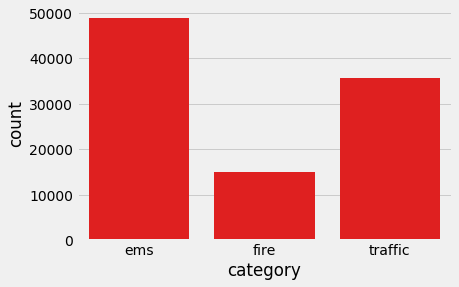

In [13]:
sns.countplot('category',data=calls, color='red' )

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [14]:
calls['month'] = calls['datetime'].dt.month
calls['year'] = calls['datetime'].dt.year
calls['day_of_week'] = calls['datetime'].dt.dayofweek
calls['hour'] = calls['datetime'].dt.hour

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['day_of_week'] = calls['day_of_week'].map(dmap)

In [15]:
calls['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

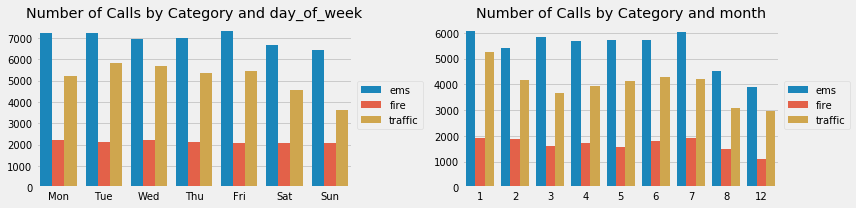

In [16]:
import matplotlib
matplotlib.rcParams.update({'font.size':10})
fig, axes = plt.subplots(1,2,figsize=(12,3))
var = ['day_of_week', 'month']
orders = [['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],[1,2,3,4,5,6,7,8,12]]
for i, ax in enumerate(axes.flatten()):
    sns.countplot(var[i], data=calls, hue='category', order=orders[i], ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
    ax.set_title('Number of Calls by Category and ' + var[i])
    ax.axes.get_xaxis().get_label().set_visible(False)
    ax.axes.get_yaxis().get_label().set_visible(False)
fig.tight_layout()

In [17]:
for k,v in matplotlib.rcParams.items():
    print(k)

_internal.classic_mode
agg.path.chunksize
animation.avconv_args
animation.avconv_path
animation.bitrate
animation.codec
animation.convert_args
animation.convert_path
animation.embed_limit
animation.ffmpeg_args
animation.ffmpeg_path
animation.frame_format
animation.html
animation.html_args
animation.writer
axes.autolimit_mode
axes.axisbelow
axes.edgecolor
axes.facecolor
axes.formatter.limits
axes.formatter.min_exponent
axes.formatter.offset_threshold
axes.formatter.use_locale
axes.formatter.use_mathtext
axes.formatter.useoffset
axes.grid
axes.grid.axis
axes.grid.which
axes.labelcolor
axes.labelpad
axes.labelsize
axes.labelweight
axes.linewidth
axes.prop_cycle
axes.spines.bottom
axes.spines.left
axes.spines.right
axes.spines.top
axes.titlepad
axes.titlesize
axes.titleweight
axes.unicode_minus
axes.xmargin
axes.ymargin
axes3d.grid
backend
backend_fallback
boxplot.bootstrap
boxplot.boxprops.color
boxplot.boxprops.linestyle
boxplot.boxprops.linewidth
boxplot.capprops.color
boxplot.capprops.

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [18]:
bymonth = calls.groupby('month').count().iloc[:,0].reset_index().rename(columns={'lat':'count'})
bymonth

,month,count
0,1,13205
1,2,11467
2,3,11101
3,4,11326
4,5,11423
5,6,11786
6,7,12137
7,8,9078
8,12,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

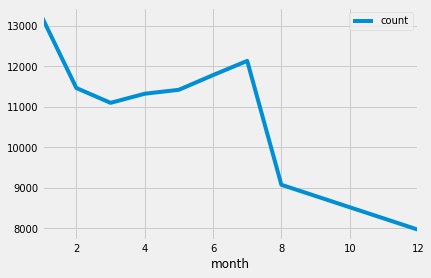

In [19]:
bymonth.plot(x='month',y='count')

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

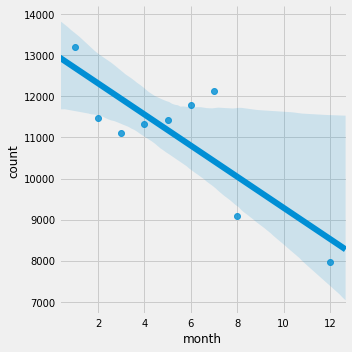

In [20]:
sns.lmplot(x='month', y='count', data=bymonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [21]:
calls['date'] = calls['datetime'].dt.date
bydate = pd.DataFrame(calls.groupby('date').count().iloc[:,0])
bydate

,lat
date,
2015-12-10,115
2015-12-11,396
2015-12-12,403
2015-12-13,319
2015-12-14,447
...,...
2016-08-20,328
2016-08-21,357
2016-08-22,389


Text(0, 0.5, 'Count')

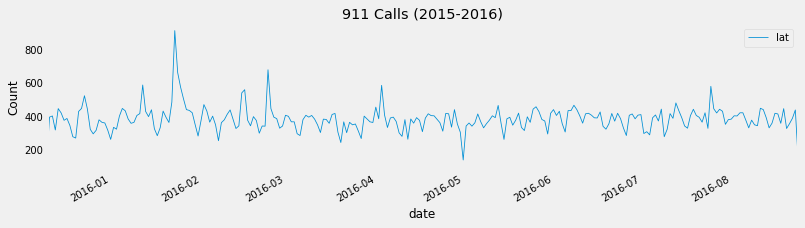

In [22]:
fig, ax = plt.subplots(figsize=(12,3))
bydate.plot(linewidth=.8,ax=ax)
fig.autofmt_xdate()
ax.grid(False)
ax.set_title('911 Calls (2015-2016)')
ax.set_ylabel('Count')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [23]:
bydate_and_reason = pd.DataFrame(calls.groupby(['category','date']).count().iloc[:,0].rename(columns={'lat':'count'}))
bydate_and_reason.rename(columns={0:'count'}, inplace=True)

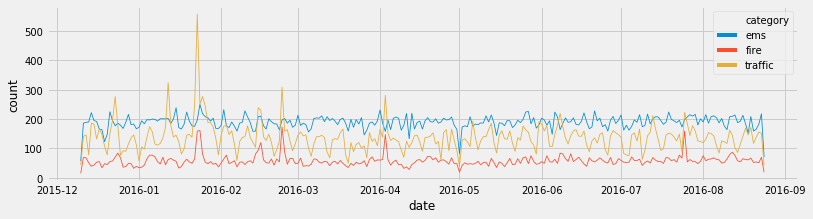

In [25]:
bydate_and_reason.reset_index(inplace=True, level=0)
fig, ax = plt.subplots(figsize=(12,3))
sns.lineplot(data=bydate_and_reason, x=bydate_and_reason.index, y='count', hue='category', linewidth=.8)

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [26]:
by_day_hour = calls.groupby(['day_of_week', 'hour']).count().iloc[:,0].unstack(level=1)

** Now create a HeatMap using this new DataFrame. **

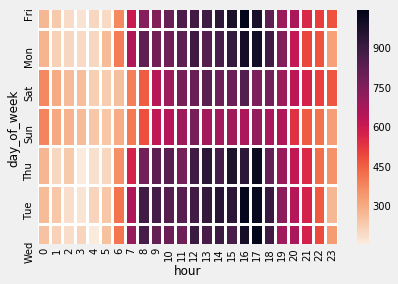

In [27]:
sns.heatmap(by_day_hour, linewidths=2, cmap=sns.cm.rocket_r)

** Now create a clustermap using this DataFrame. **

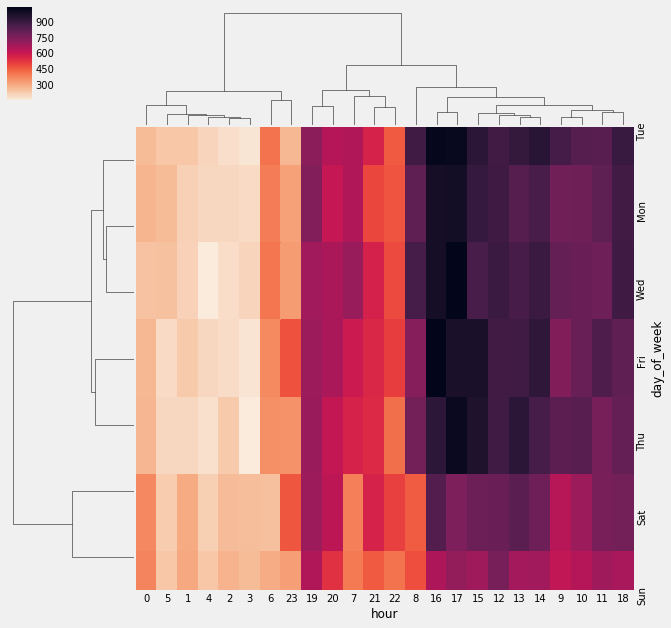

In [28]:
sns.clustermap(by_day_hour, cmap=sns.cm.rocket_r)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

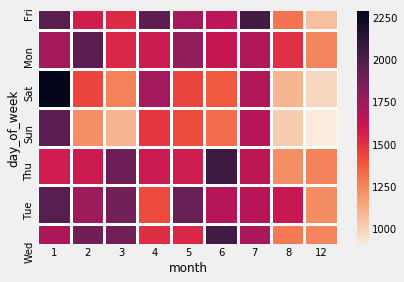

In [29]:
by_day_month = calls.groupby(['day_of_week', 'month']).count().iloc[:,0].unstack(level=1)
sns.heatmap(by_day_month, cmap=sns.cm.rocket_r, linewidths=2)

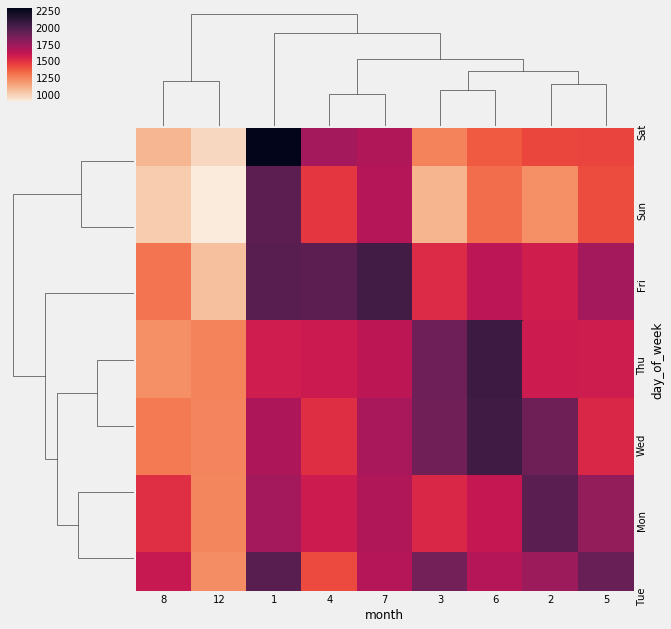

In [30]:
sns.clustermap(by_day_month, cmap=sns.cm.rocket_r)

In [31]:
locs = calls.groupby(['zip']).first().iloc[:,:2]

In [32]:
by_zip = pd.DataFrame(by_zip.reset_index().rename(columns={0:'count'}))
merged = by_zip.merge(locs, left_on='zip', right_index=True)
merged.head()

,zip,count,lat,lng
0,17752.0,1,41.167156,-76.874030
1,18036.0,2,40.456517,-75.463066
2,18041.0,414,40.414249,-75.509016
3,18054.0,326,40.349068,-75.481830
4,18056.0,6,40.453060,-75.556029


In [41]:
import plotly.express as px
fig = px.scatter_mapbox(merged, lat="lat", lon="lng", color="count", size="count")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

**Continue exploring the Data however you see fit!**
# Great Job!